## import libraries

In [98]:
%%capture
!pip install persiantools

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
from persiantools.jdatetime import JalaliDate

## Reading the dataset

In [101]:
'https://drive.google.com/file/d/1AnVl0yjaK9Qleo2S2SVgUkbxoCEVbSV0/view?usp=share_link'

'https://drive.google.com/file/d/1AnVl0yjaK9Qleo2S2SVgUkbxoCEVbSV0/view?usp=share_link'

Download and extract files

In [102]:
# run in google colab
!gdown 1AnVl0yjaK9Qleo2S2SVgUkbxoCEVbSV0

Downloading...
From: https://drive.google.com/uc?id=1AnVl0yjaK9Qleo2S2SVgUkbxoCEVbSV0
To: /content/sample_data.csv
100% 14.8M/14.8M [00:00<00:00, 141MB/s]


In [103]:
df = pd.read_csv('sample_data.csv', parse_dates=['date'])
df.tail()

,order_id,date,user_id,total_purchase,latitude,longitude
261744,1164783,2018-06-30,24868,50000.0,35.701548,51.372431
261745,1164784,2018-06-30,18482,334000.0,35.701512,51.372467
261746,1164785,2018-06-30,10899,459000.0,35.701548,51.372431
261747,1164787,2018-06-30,17808,50000.0,35.701548,51.372431
261748,1164788,2018-06-30,26683,126000.0,35.701518,51.372431


In [104]:
df['JalaliDate'] = df['date'].map(JalaliDate)

In [105]:
df.sort_values(by=['date', 'user_id', 'order_id'])

,order_id,date,user_id,total_purchase,latitude,longitude,JalaliDate
1038,536855,2018-01-01,10082,70000.0,35.408888,51.155403,1396-10-11
893,536507,2018-01-01,10130,56000.0,35.730050,51.488502,1396-10-11
802,536277,2018-01-01,10186,68000.0,35.659062,51.397659,1396-10-11
1213,537297,2018-01-01,10252,763000.0,35.788947,51.464018,1396-10-11
778,536230,2018-01-01,10287,1074000.0,35.724546,51.296312,1396-10-11
...,...,...,...,...,...,...,...
261122,1163592,2018-06-30,63111,374000.0,35.719717,51.418806,1397-04-09
260347,1162015,2018-06-30,63112,50000.0,35.723107,51.423352,1397-04-09
261388,1164098,2018-06-30,63114,214000.0,35.731087,51.427249,1397-04-09
260011,1161343,2018-06-30,63116,309000.0,35.691792,51.446060,1397-04-09


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261749 entries, 0 to 261748
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   order_id        261749 non-null  int64         
 1   date            261749 non-null  datetime64[ns]
 2   user_id         261749 non-null  int64         
 3   total_purchase  261706 non-null  float64       
 4   latitude        261749 non-null  float64       
 5   longitude       261749 non-null  float64       
 6   JalaliDate      261749 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 14.0+ MB


# Question 1

In [107]:
df['week_day'] = df.JalaliDate.map(lambda x: int(x.weekday()))
df.head()

,order_id,date,user_id,total_purchase,latitude,longitude,JalaliDate,week_day
0,534188,2018-01-01,55205,439000.0,35.659323,51.397546,1396-10-11,2
1,534189,2018-01-01,46288,64000.0,35.688643,51.331780,1396-10-11,2
2,534194,2018-01-01,53219,242000.0,35.681196,51.383196,1396-10-11,2
3,534195,2018-01-01,42800,483000.0,35.690208,51.310495,1396-10-11,2
4,534196,2018-01-01,34064,50000.0,35.689885,51.311519,1396-10-11,2


In [108]:
df['order_id'].nunique() == df.shape[0]

True

In [109]:
df.groupby('week_day').agg({'total_purchase': [np.mean, np.std]})

total_purchase               
                   mean            std
week_day                              
0         255484.306572  539137.951720
1         254611.115180  243148.163998
2         254602.270642  244314.041651
3         253284.563302  243388.278834
4         254239.408049  244933.768814
5         254747.714297  245878.530111
6         254364.198495  244169.048065

<Axes: title={'center': 'average total purchase'}, xlabel='week_day'>

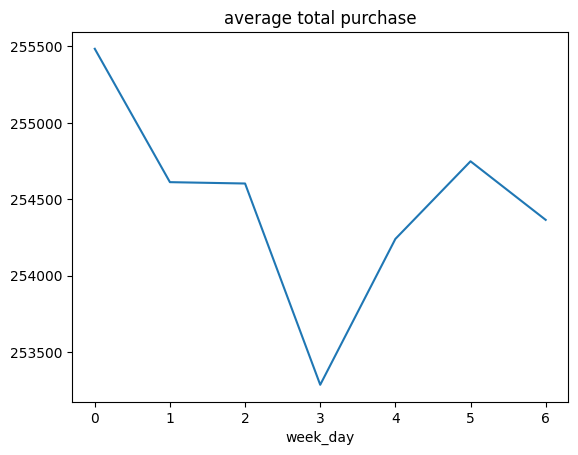

In [110]:
df.groupby('week_day')['total_purchase'].mean().plot.line(title='average total purchase')

In [118]:
df_daily_count = df.groupby('date').count()['order_id'].reset_index()

In [119]:
df_daily_count['week_day'] = df_daily_count['date'].map(lambda x: x.strftime('%A'))

In [121]:
df_daily_count.rename(columns={'order_id':'daily_demand'}, inplace=True)

In [122]:
df_daily_count

,date,daily_demand,week_day
0,2018-01-01,1714,Monday
1,2018-01-02,1683,Tuesday
2,2018-01-03,1830,Wednesday
3,2018-01-04,1020,Thursday
4,2018-01-05,977,Friday
...,...,...,...
176,2018-06-26,2444,Tuesday
177,2018-06-27,2466,Wednesday
178,2018-06-28,1032,Thursday
179,2018-06-29,944,Friday


In [123]:
df_daily_demand = df_daily_count.groupby('week_day').agg({'daily_demand':[ np.mean, np.std]}).loc[['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], :]

In [124]:
df_daily_demand.columns = ['Average_daily_demand', 'Standard_deviation_of_daily_demand']

In [125]:
df_daily_demand

,Average_daily_demand,Standard deviation of daily demand
week_day,,
Saturday,1660.807692,514.100225
Sunday,1629.000000,424.841343
Monday,1677.192308,439.129413
Tuesday,1584.961538,406.859827
Wednesday,1668.884615,400.108018
Thursday,963.615385,139.029803
Friday,945.461538,86.894525


<Axes: title={'center': 'Average daily demand'}, xlabel='week_day'>

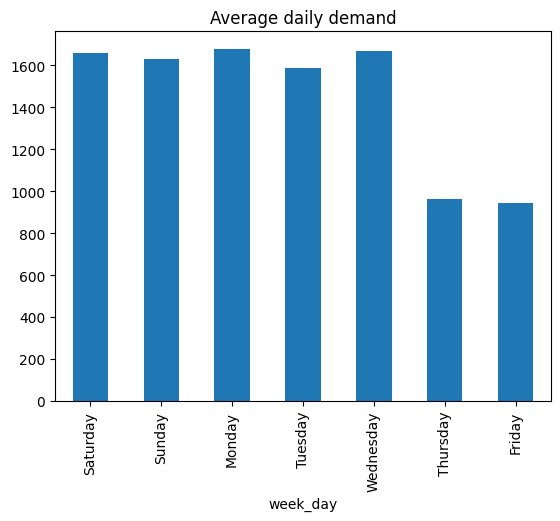

In [116]:
df_daily_demand['Average_daily_demand'].plot(kind='bar', title='Average daily demand')

# Question 2

In [133]:
df_daily_count['working_day'] = df_daily_count.week_day.map({'Saturday':'WorkingDays', 
                             'Sunday':'WorkingDays', 
                             'Monday':'WorkingDays', 
                             'Tuesday':'WorkingDays', 
                             'Wednesday':'WorkingDays', 
                             'Thursday':'Weekend', 
                             'Friday':'Weekend'})

In [134]:
df_daily_count

,date,daily_demand,week_day,working_day
0,2018-01-01,1714,Monday,WorkingDays
1,2018-01-02,1683,Tuesday,WorkingDays
2,2018-01-03,1830,Wednesday,WorkingDays
3,2018-01-04,1020,Thursday,Weekend
4,2018-01-05,977,Friday,Weekend
...,...,...,...,...
176,2018-06-26,2444,Tuesday,WorkingDays
177,2018-06-27,2466,Wednesday,WorkingDays
178,2018-06-28,1032,Thursday,Weekend
179,2018-06-29,944,Friday,Weekend


In [136]:
import seaborn as sns

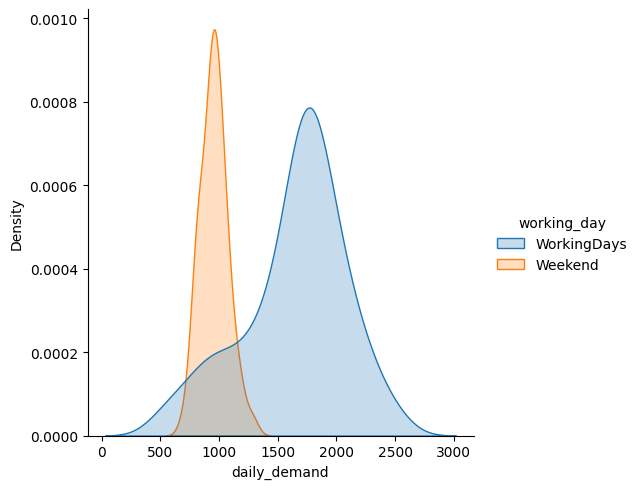

In [147]:
sns.displot(df_daily_count, x="daily_demand", hue="working_day", kind="kde", fill=True)

<Axes: xlabel='daily_demand', ylabel='Percent'>

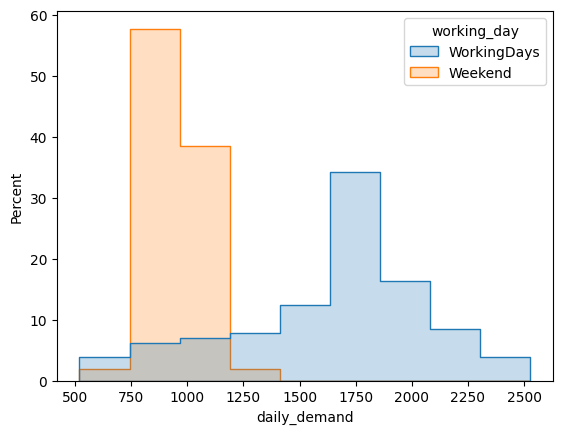

In [146]:
sns.histplot(
    df_daily_count, x="daily_demand", hue="working_day", element="step",
    stat="percent", common_norm=False,
)

## For all data

# Question 3

## Creating RFM table

In [148]:
last_date = df.date.max()

In [149]:
recency = df.groupby('user_id')['date'].apply(lambda x: (last_date - x.max()).days +1)

In [150]:
frequency = df.groupby('user_id')['order_id'].nunique()

In [151]:
monetary = df.groupby('user_id')['total_purchase'].sum()

In [153]:
data_rfm = pd.concat([recency, frequency, monetary], axis=1).rename(columns={"date": "Recency", "order_id": "Frequency", "total_purchase": "MonetaryValue"})
data_rfm

,Recency,Frequency,MonetaryValue
user_id,,,
10000,14,6,822000.0
10001,26,3,185000.0
10002,4,3,163000.0
10003,30,4,1159000.0
10004,132,2,338000.0
...,...,...,...
63142,57,3,1053000.0
63143,64,3,757000.0
63144,12,6,1570000.0


### Visualizing RFM variables.

In [154]:
import seaborn as sns

<Axes: >

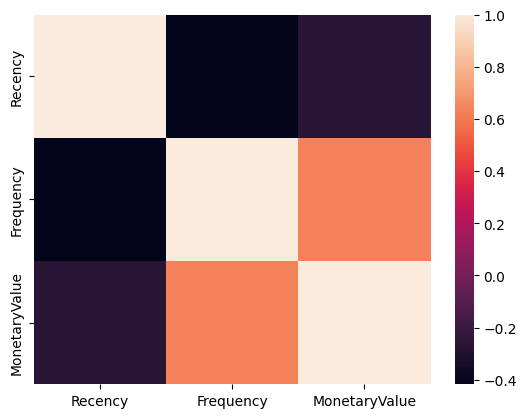

In [155]:
sns.heatmap(data_rfm.iloc[:, 0:3].corr())

## Using K-means clustering

<ipython-input-156-dba60d956778>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_rfm[feature], ax=axes[i])
<ipython-input-156-dba60d956778>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_rfm[feature], ax=axes[i])
<ipython-input-156-dba60d956778>:3: UserWarning: 

`distplot` is a dep

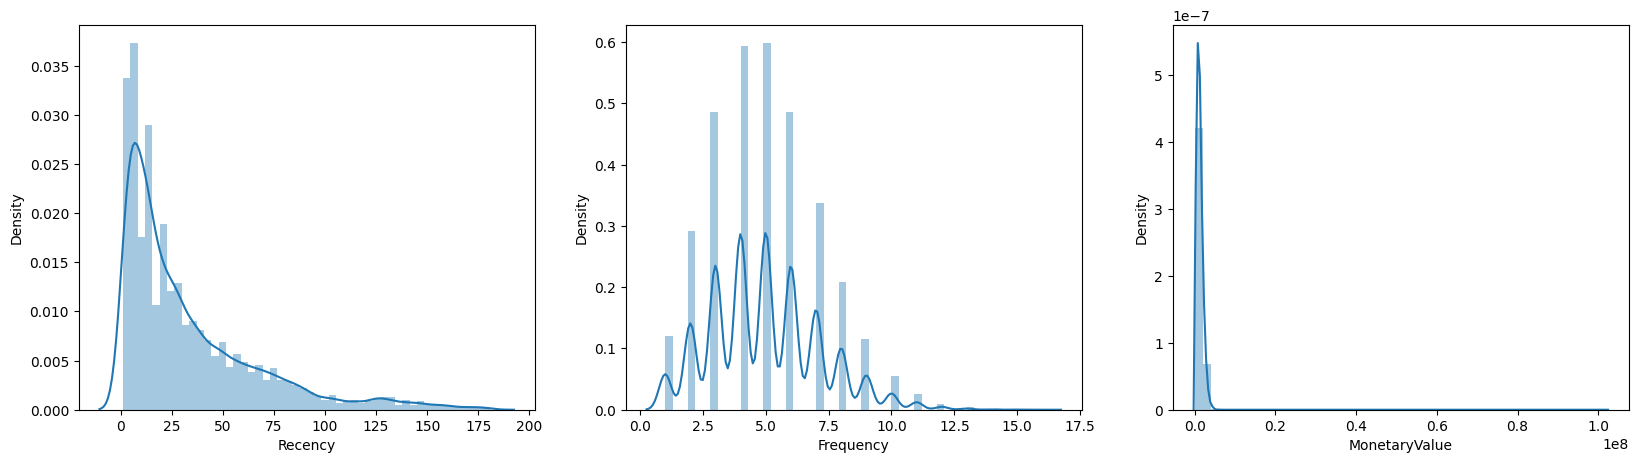

In [156]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
for i, feature in enumerate(list(data_rfm.columns)):
  sns.distplot(data_rfm[feature], ax=axes[i])

The graphs above are not like normal distribution.
because the range of the variables are so high, it would be better to do log transformation.

In [157]:
# normalizing the dataset with log transformation on the RFM dataframe
data_rfm_log = np.log(data_rfm) 

<ipython-input-158-ae137363053f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_rfm_log[feature], ax=axes[i])
<ipython-input-158-ae137363053f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_rfm_log[feature], ax=axes[i])
<ipython-input-158-ae137363053f>:3: UserWarning: 

`distplot` 

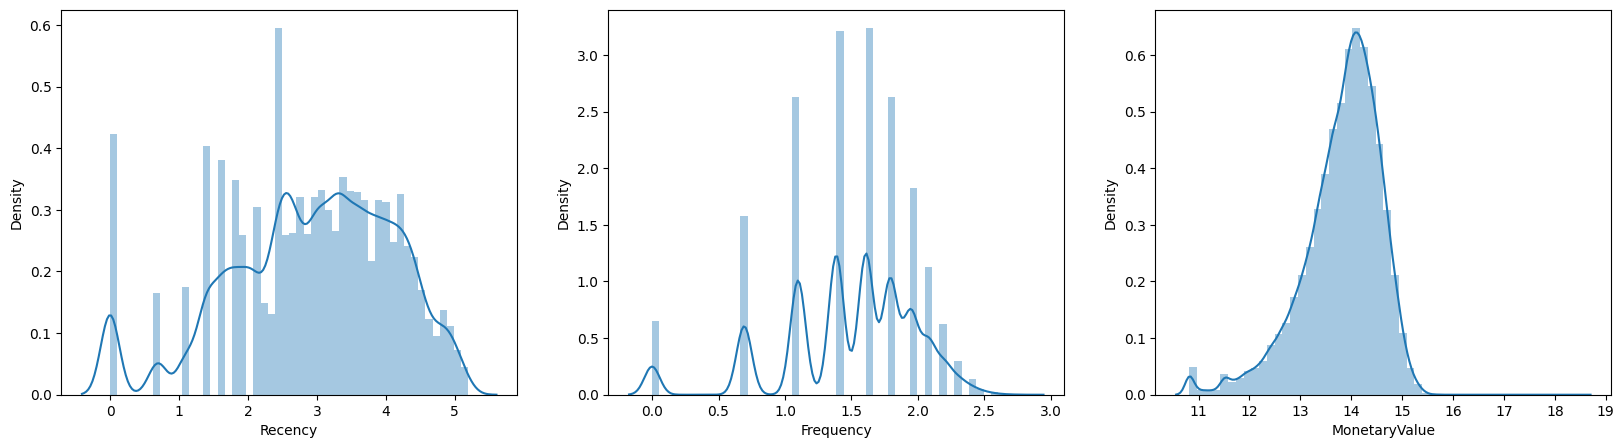

In [158]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
for i, feature in enumerate(list(data_rfm_log.columns)):
  sns.distplot(data_rfm_log[feature], ax=axes[i])

After normalizing the dataset, we will need to standardize it as well so that each metric (Recency, Frequency, and MonetaryValue) is from the same scale. 

In [159]:
#standardizing the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit and transform
# data_rfm_standard = scaler.fit_transform(data_rfm)
data_rfm_standard = scaler.fit_transform(data_rfm_log)

# #store it separately for clustering
# data_rfm_standard = scaler.transform(data_rfm_log)

#turn the processed data back into a dataframe
data_rfm_standard = pd.DataFrame(data = data_rfm_standard, 
                                index = data_rfm.index, 
                                columns = data_rfm.columns) 

In [ ]:
data_rfm_standard

,Recency,Frequency,MonetaryValue
CustomerID,,,
465132,0.682909,-0.388629,0.374013
465164,-0.529623,-0.388629,-1.995741
465198,-2.950062,-0.388629,0.140628
465204,0.893014,-0.388629,-1.127424
465211,0.119010,-0.388629,-0.025785
...,...,...,...
46144731,0.363683,-0.388629,-0.681294
46188806,0.765050,-0.388629,0.585822
46380582,-1.514233,-0.388629,0.949577


### Estimating the number of clusters

<ipython-input-161-fadff7b82107>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(data_rfm_standard['Recency'], data_rfm_standard['Frequency'], data_rfm_standard['MonetaryValue'],


Text(0.5, 0, 'MonetaryValue')

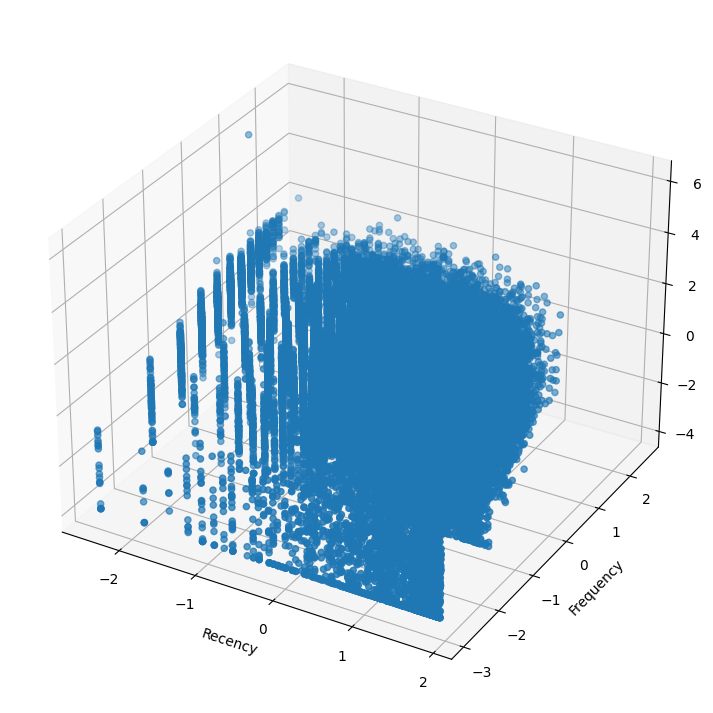

In [161]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_rfm_standard['Recency'], data_rfm_standard['Frequency'], data_rfm_standard['MonetaryValue'],
           cmap='brg')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')

#### The elbow method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

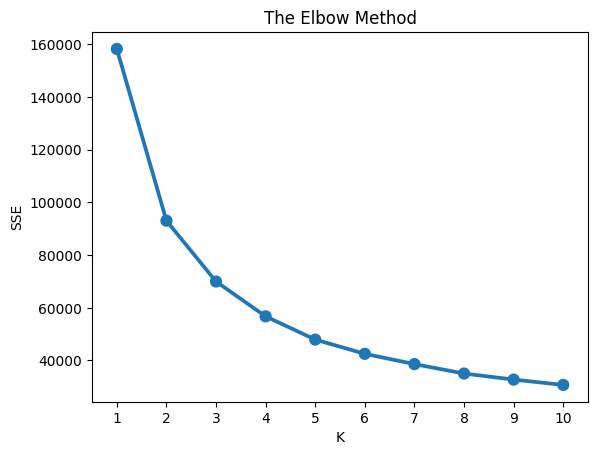

In [162]:
#import clustering libraries
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

#fit KMeans and calculate SSE for each K
sse = {}
for k in range(1,11):
	kmeans = KMeans(n_clusters = k, random_state=1)
	kmeans.fit(data_rfm_standard)
	sse[k] = kmeans.inertia_ 

#plot SSE for each K
plt.title('The Elbow Method')
plt.xlabel('K'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show() 

Based on the elbow method, the best number of K for this case study is 3

#### The silhouette method

SLOW RUNTIME: takes too long to execute!!

In [163]:
from sklearn.metrics import silhouette_score

In [164]:
kmeans_kwargs = {
    #  "init": "random",
    #  "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
} 

In [165]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(data_rfm_standard)
     score = silhouette_score(data_rfm_standard, kmeans.labels_)
     silhouette_coefficients.append(score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

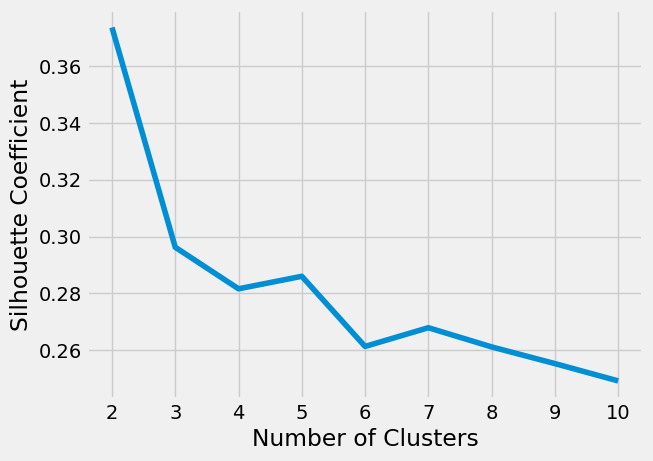

In [166]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Based on the silhouette method, the best number of K for this case study is 2


### Clustering for 3 clusters

Based on the elbow method, 3 clusters look good.

In [167]:
kmeans = KMeans(n_clusters = 3, random_state=1)
#compute k-means clustering on pre-processed data
kmeans.fit(data_rfm_standard)
#extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_ 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [168]:
df_k3 = data_rfm.assign(Cluster = cluster_labels) 

#### Summary and visualization

In [169]:
df_k3

,Recency,Frequency,MonetaryValue,Cluster
user_id,,,,
10000,14,6,822000.0,0
10001,26,3,185000.0,1
10002,4,3,163000.0,1
10003,30,4,1159000.0,0
10004,132,2,338000.0,1
...,...,...,...,...
63142,57,3,1053000.0,0
63143,64,3,757000.0,0
63144,12,6,1570000.0,2


In [170]:
summary = df_k3.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
    })
print(summary) 

           Recency Frequency MonetaryValue       
              mean      mean          mean  count
Cluster                                          
0        40.538963  5.062561  1.321105e+06  23625
1        59.408015  2.329690  4.142883e+05  10980
2         7.115035  6.422015  1.698922e+06  18151


Text(0.5, 0, 'MonetaryValue')

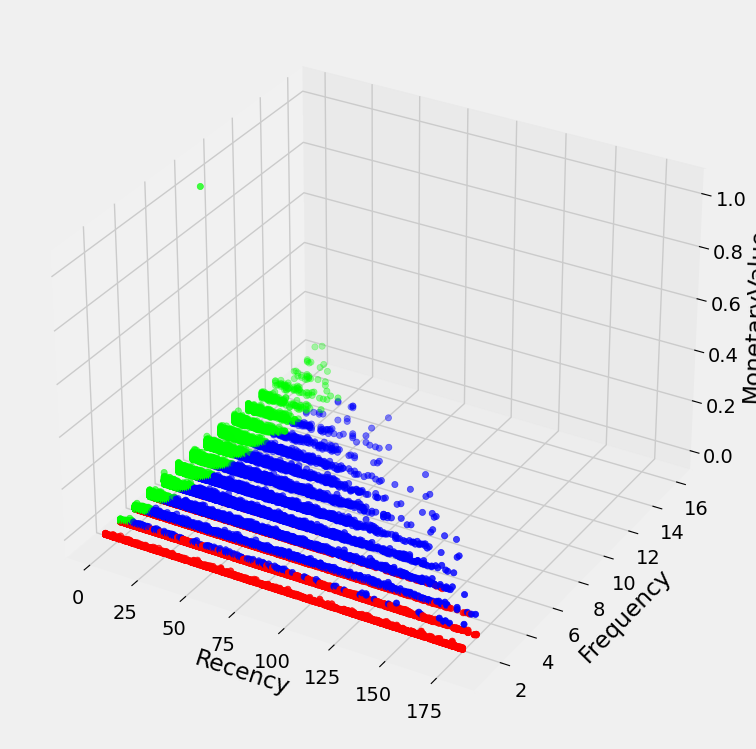

In [171]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_k3['Recency'], df_k3['Frequency'], df_k3['MonetaryValue'],
           cmap='brg', c=df_k3['Cluster'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')

In [172]:
%%capture
!pip install --upgrade plotly

In [173]:
import plotly.express as px
from plotly.offline import iplot

fig = px.scatter_3d(df_k3, x='Recency', 
                   y='Frequency', z='MonetaryValue', 
                   color='Cluster')
iplot(fig) 